# Data Mining Project

In [1]:
#setup
import numpy
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
from mpl_toolkits import mplot3d
plotly.tools.set_credentials_file(username='xavier2696', api_key='97cuXMXYTejnMxo9gpIk')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#keys
origin_time_key = 'Origin Time'
epicenter_longitude_key = 'EpicenterLongitude'
epicenter_latitude_key = 'EpicenterLatitude'
depth_key = 'Depth'
magnitude_key = 'Magnitude'
station_code_key = 'StationCode'
station_name_key = 'StationName'
station_longitude_key = 'StationLongitude'
station_latitude_key = 'StationLatitude'
instrument_kind_key = 'InstrumentKind'
start_time_key = 'StartTime'
record_length_key = 'RecordLength'
sample_rate_key = 'SampleRate'
amplitude_unit_key = 'AmplitudeUnit'
amplitude_max_u_key = 'AmplitudeMAX. U'
amplitude_max_n_key = 'AmplitudeMAX. N'
amplitude_max_e_key = 'AmplitudeMAX. E'

earthquake_column_names_dict = {origin_time_key: 'origin_time',
                               epicenter_longitude_key: 'epicenter_longitude',
                               epicenter_latitude_key: 'epicenter_latitude',
                               depth_key: 'depth',
                               magnitude_key: 'magnitude',
                               station_code_key: 'station_code',
                               station_name_key: 'station_name',
                               station_longitude_key: 'station_longitude',
                               station_latitude_key: 'station_latitude',
                               instrument_kind_key: 'instrument_kind',
                               start_time_key: 'start_time',
                               record_length_key: 'record_length',
                               sample_rate_key: 'sample_rate',
                               amplitude_unit_key: 'amplitude_unit',
                               amplitude_max_u_key: 'amplitude_max_u',
                               amplitude_max_n_key: 'amplitude_max_n',
                               amplitude_max_e_key: 'amplitude_max_e'}

earthquake_keys = [origin_time_key, epicenter_longitude_key, epicenter_latitude_key, depth_key, magnitude_key, \
                  station_code_key, station_name_key, station_longitude_key, station_latitude_key, \
                   instrument_kind_key, start_time_key, record_length_key, sample_rate_key, amplitude_unit_key, \
                  amplitude_max_u_key, amplitude_max_n_key, amplitude_max_e_key]

In [4]:
#method for creating a dictionary with the lines of the file
def earthquake_dict(lines_array):
    earthquake = {}
    for line in earthquake_array:
        if ':' in line:
            for key in earthquake_keys:
                if key in line:
                    if '~' in line:
                        range_string = line.split(': ')[1]
                        lower = (range_string.split('~')[1]).strip()
                        upper = (range_string.split('~')[0]).strip()
                        earthquake[earthquake_column_names_dict[key] + '_lower'] = float(lower)
                        earthquake[earthquake_column_names_dict[key] + '_upper'] = float(upper)
                    else:
                        try:
                            value = float((line.split(': ')[1]).strip())
                            earthquake[earthquake_column_names_dict[key]] = value
                        except ValueError:
                            earthquake[earthquake_column_names_dict[key]] = (line.split(': ')[1]).strip()
                        
    return earthquake

In [5]:
#add data for the earthquakes
#get files for eq_cwb directory
earthquakes = []
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII'):
    path = os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file,"r") as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]
                
#get files for eq_ncree directory
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_ncree/106'):
    path = os.getcwd() + '/data/earthquake/eq_ncree/106/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file, encoding='windows-1254') as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]

earthquake_df = pd.DataFrame.from_dict(earthquakes)
print('Length:', len(earthquake_df))
    

Length: 2338


In [6]:
earthquake_df[0:10]

,amplitude_max_e_lower,amplitude_max_e_upper,amplitude_max_n_lower,amplitude_max_n_upper,amplitude_max_u_lower,amplitude_max_u_upper,amplitude_unit,depth,epicenter_latitude,epicenter_longitude,instrument_kind,magnitude,origin_time,record_length,sample_rate,start_time,station_code,station_latitude,station_longitude,station_name
0,-5.802,6.759,-5.264,5.862,-5.623,4.187,gal. DCoffset(corr),11.6,23.03,121.45,FBA,3.4,2017/01/08-03:52:23,180.0,50.0,2017/01/08-03:51:12.000,ECS,23.095,121.219,Chishang
1,-4.965,5.802,-8.733,12.741,-6.101,3.709,gal. DCoffset(corr),11.6,23.03,121.45,FBA,3.4,2017/01/08-03:52:23,180.0,50.0,2017/01/08-03:51:12.000,EDH,22.972,121.305,Donghe
2,-20.876,20.038,-18.902,12.143,-4.606,2.931,gal. DCoffset(corr),11.6,23.03,121.45,FBA,3.4,2017/01/08-03:52:23,180.0,50.0,2017/01/08-03:51:12.000,CHK,23.098,121.373,Chenggong
3,-1.735,1.256,-2.094,2.273,-2.452,2.632,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WNT1,23.907,120.680,Nantou City
4,-1.316,1.196,-1.495,1.436,-0.598,0.538,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,TCU,24.146,120.684,Taichung City
5,-4.845,4.965,-4.546,3.768,-2.991,2.871,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,SGS,23.080,120.591,Jiaxian
6,-1.316,1.196,-1.675,1.555,-0.479,0.479,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WYP,24.333,120.653,Waipu
7,-9.331,8.135,-10.109,8.733,-3.051,2.632,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WGK,23.685,120.570,Gukeng
8,-1.974,2.034,-2.333,2.213,-1.196,1.376,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,ECS,23.095,121.219,Chishang
9,-2.991,2.512,-2.632,2.512,-1.017,1.196,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WNT,23.877,120.693,Mingjian


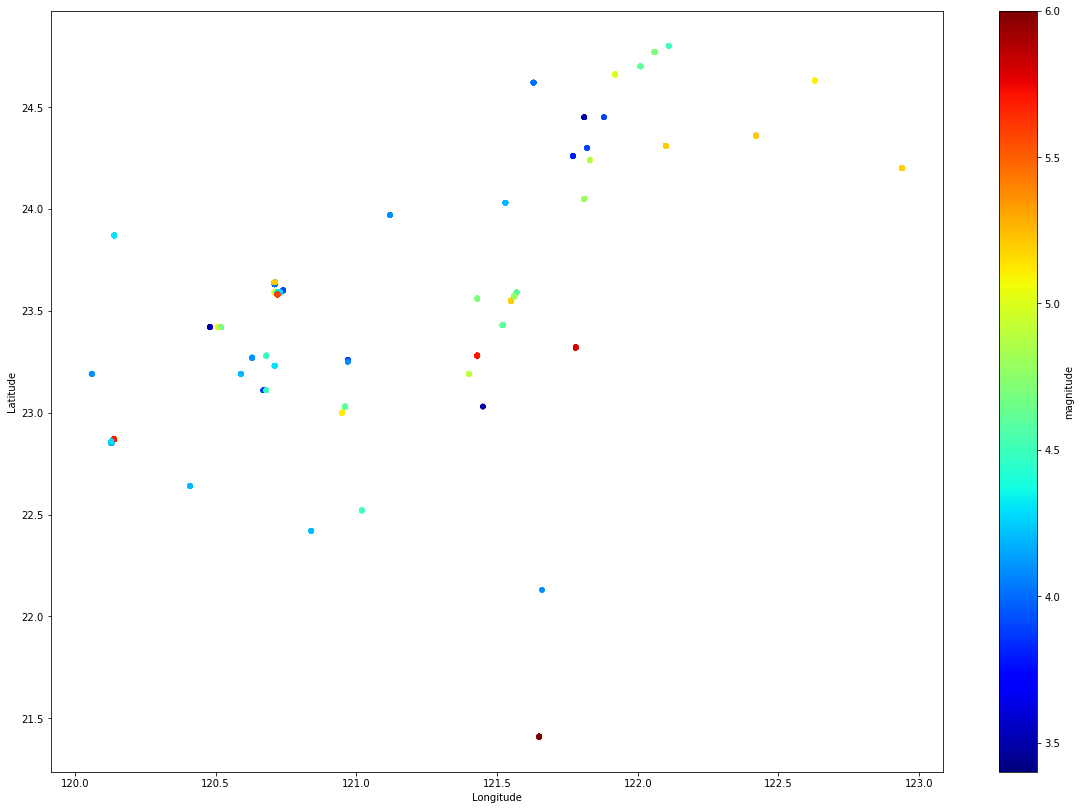

In [7]:
#earthquakes 2d scatter plots
fig, ax = plt.subplots()
earthquake_df.plot(kind="scatter", x="epicenter_longitude", y="epicenter_latitude",
    c="magnitude", cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(20,14), ax=ax
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

<IPython.core.display.Javascript object>


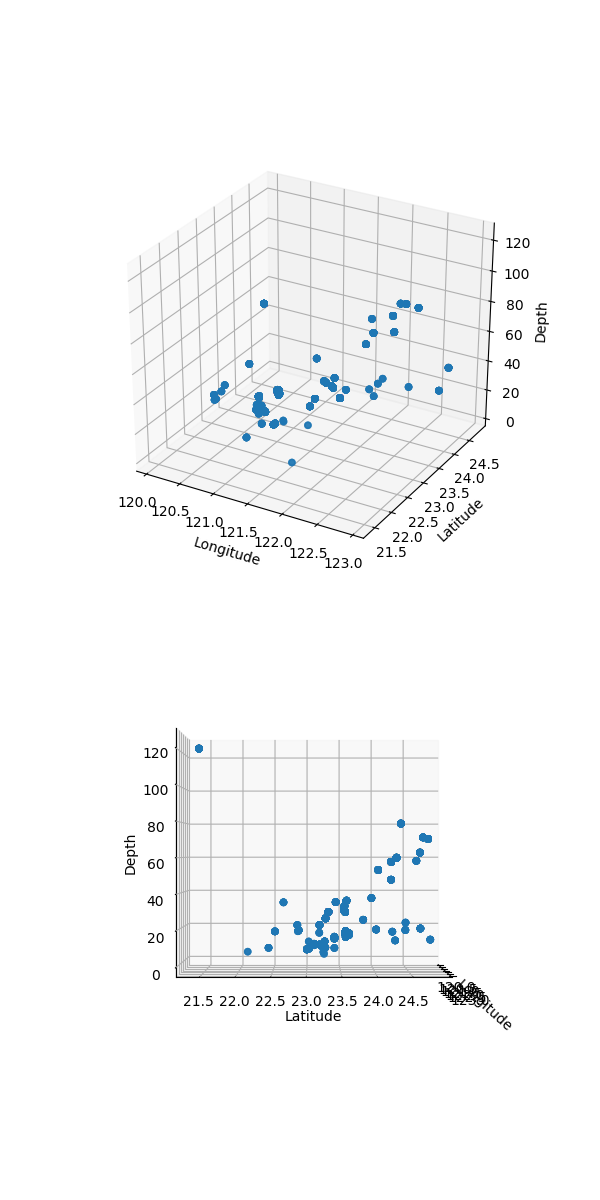

In [8]:
#earthquakes 3d scatter plots
%matplotlib notebook
fig = plt.figure(figsize=(6,12))

ax = fig.add_subplot(211, projection='3d')
ax.scatter3D(earthquake_df.epicenter_longitude, earthquake_df.epicenter_latitude, earthquake_df.depth, marker = 'o')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Depth")

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter3D(earthquake_df.epicenter_longitude, earthquake_df.epicenter_latitude, earthquake_df.depth, marker = 'o')
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_zlabel("Depth")
ax2.view_init(0, 0)
plt.show()

In [9]:
#earthquakes map plot
data = [ dict(
        type = 'scattergeo',
        locationmode = 'taiwan',
        lon = earthquake_df['epicenter_longitude'],
        lat = earthquake_df['epicenter_latitude'],
        text = ['Magnitude: ' + str(magnitude) for magnitude in earthquake_df['magnitude']],
        mode = 'markers',
        marker = dict(
            size = 4,
            opacity = 1,
            reversescale = False,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = earthquake_df['magnitude'].min(),
            color = earthquake_df['magnitude'],
            cmax = earthquake_df['magnitude'].max(),
            colorbar=dict(
                title="Magnitude"
            )
        ))]

layout = dict(
        title = 'Earthquakes in Taiwan',
        colorbar = True,
        geo = dict(
            scope='asia',
            projection=dict( type='mercator' ),
            showland = True,
            showcoastlines = True,
            showocean = True,
            showcountries = True,
            showsubunits = True,
            showframe = True,
            lonaxis = dict( range=[earthquake_df['epicenter_longitude'].min() - 1,earthquake_df['epicenter_longitude'].max() + 1]),
            lataxis = dict( range=[earthquake_df['epicenter_latitude'].min() - 1,earthquake_df['epicenter_latitude'].max() + 1])

        ),
        width = 800,
        height = 800
    )

fig = dict( data=data, layout=layout )
py.iplot(fig, validate=False, filename='taiwan_earthquakes')

In [10]:
#stations data frame
station_codes = earthquake_df.station_code.unique()
station_latitudes = []
station_longitudes = []
for code in station_codes:
    latitudes = earthquake_df.loc[lambda f: f.station_code == code].station_latitude
    if len(latitudes) > 0:
        station_latitudes += [latitudes.iloc[0]]
    longitudes = earthquake_df.loc[lambda f: f.station_code == code].station_longitude
    if len(longitudes) > 0:
        station_longitudes += [longitudes.iloc[0]]
station_df = pd.DataFrame(data={'code':station_codes, 'latitude':station_latitudes, 'longitude':station_longitudes})
len(station_df)

146

In [11]:
#stations map plot

data = [ dict(
        type = 'scattergeo',
        locationmode = 'taiwan',
        lon = station_df['longitude'],
        lat = station_df['latitude'],
        text = ['Station ID: ' + str(station_id) for station_id in station_df['code']],
        mode = 'markers',
        marker = dict(
            size = 6,
            opacity = 1,
            reversescale = False,
            symbol = 'dot',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )
        ))]

layout = dict(
        title = 'Monitoring Stations in Taiwan',
        geo = dict(
            scope='asia',
            projection=dict( type='mercator' ),
            showland = True,
            showcoastlines = True,
            showocean = True,
            showcountries = True,
            showsubunits = True,
            showframe = True,
            lonaxis = dict( range=[station_df['longitude'].min() - 1,station_df['longitude'].max() + 1]),
            lataxis = dict( range=[station_df['latitude'].min() - 1,station_df['latitude'].max() + 1])

        ),
        width = 800,
        height = 800
    )

fig = dict( data=data, layout=layout )
py.iplot(fig, validate=False, filename='taiwan_earthquakes')